In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [30]:
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [3]:
train = pd.read_csv("/home/jayesh/Downloads/train_ctrUa4K.csv")
test = pd.read_csv("/home/jayesh/Downloads/test_lAUu6dG.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
train.describe()
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [4]:
train.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train.shape 


(614, 13)

In [6]:
test.shape

(367, 12)

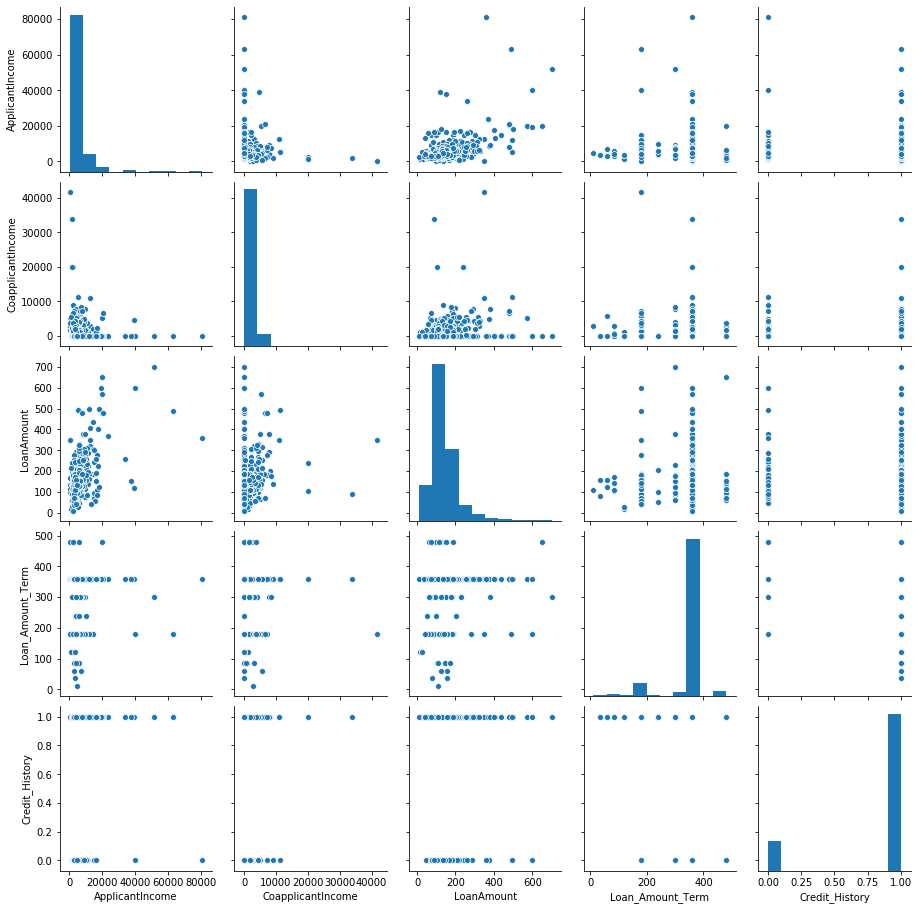

In [7]:
import seaborn as sns; 
sns.pairplot(train)

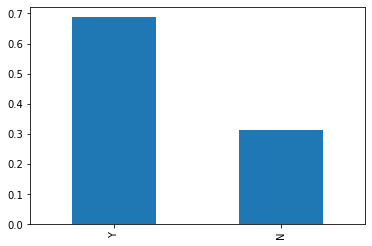

In [8]:
train['Loan_Status'].value_counts(normalize=True).plot.bar()

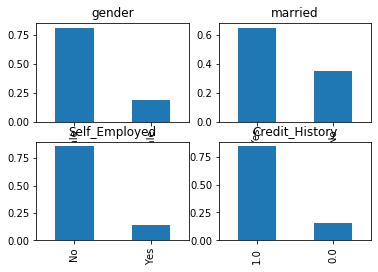

In [9]:
plt.figure(1); plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title= "gender")
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= "married")
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= "Self_Employed")
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= "Credit_History")  

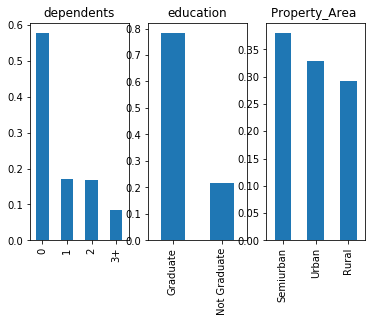

In [10]:
plt.figure(1); plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(title= "dependents")
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= "education")
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= "Property_Area ")


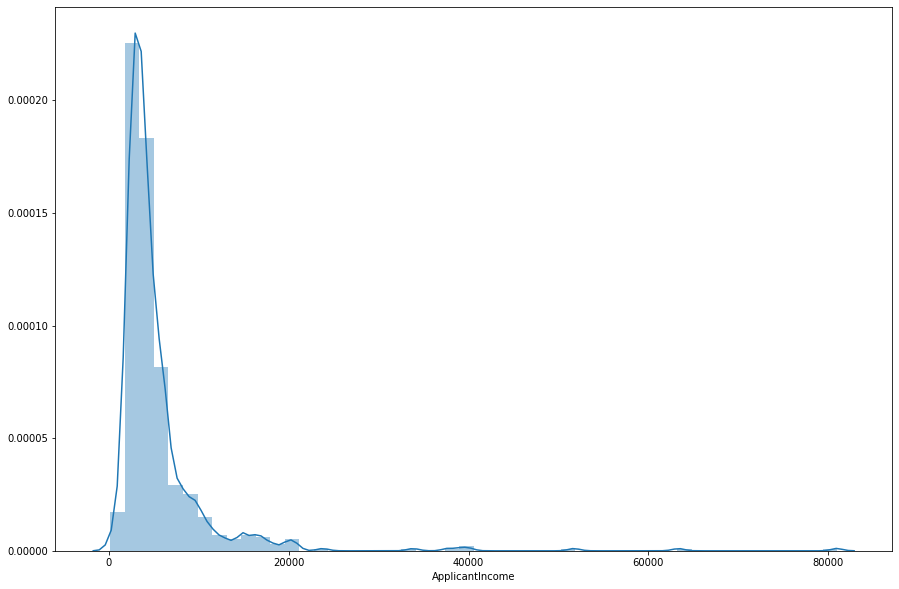

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(train['ApplicantIncome'],hist=True,kde=True,rug=False,label='ApplicantIncome',norm_hist=True)

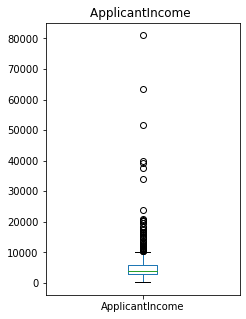

In [12]:
plt.figure(1)
plt.subplot(141)
train['ApplicantIncome'].plot.box(title= "ApplicantIncome ",figsize=(16,5))

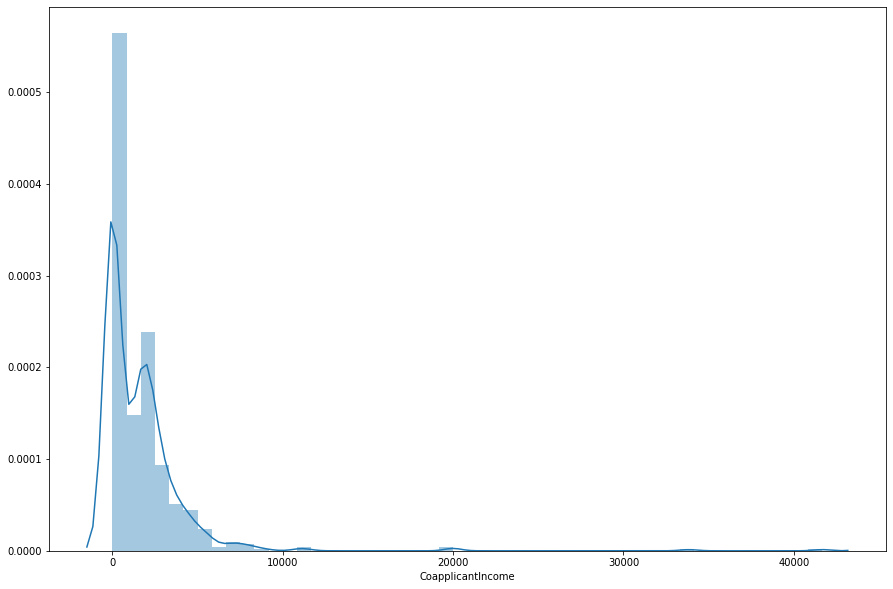

In [13]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(train['CoapplicantIncome'],hist=True,kde=True,rug=False,label='CoapplicantIncome',norm_hist=True)


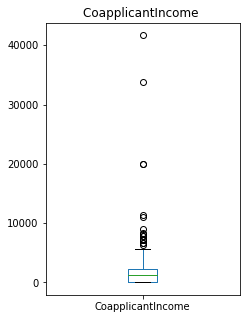

In [14]:
plt.figure(1)
plt.subplot(141)
train['CoapplicantIncome'].plot.box(title= "CoapplicantIncome ",figsize=(16,5))

Text(0.5, 0.98, '')

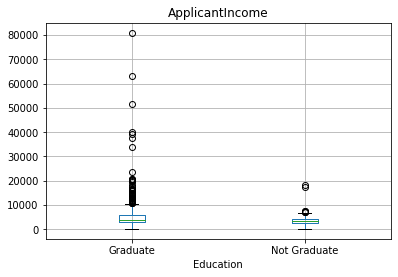

In [15]:
train.boxplot(column='ApplicantIncome' , by='Education') 
plt.suptitle("")


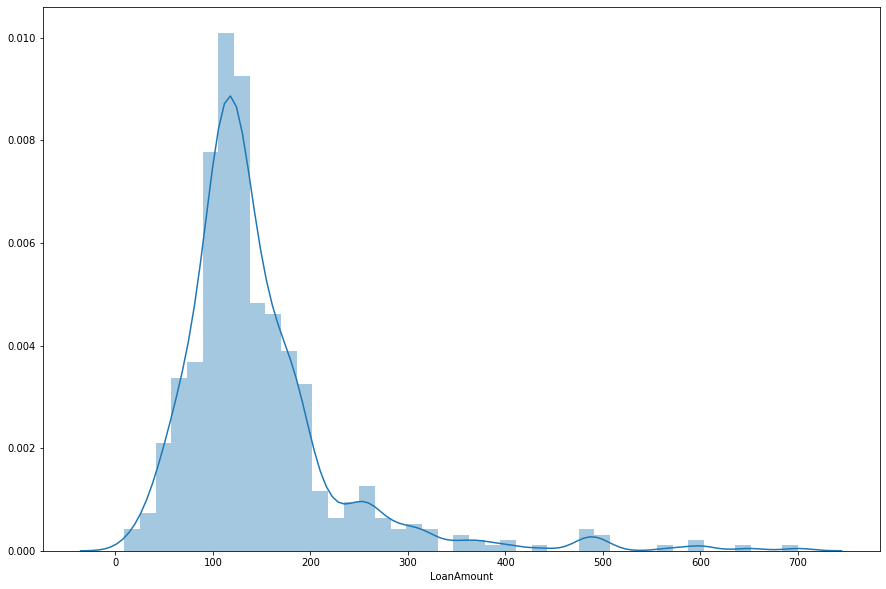

In [16]:
import seaborn as sns
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(train['LoanAmount'],hist=True,kde=True,rug=False,label='LoanAmount',norm_hist=True)

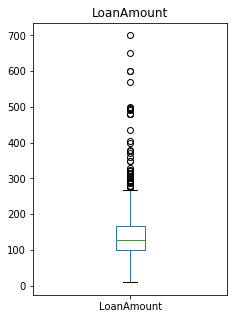

In [17]:
plt.figure(1)
plt.subplot(141)
train['LoanAmount'].plot.box(title= "LoanAmount",figsize=(16,5))

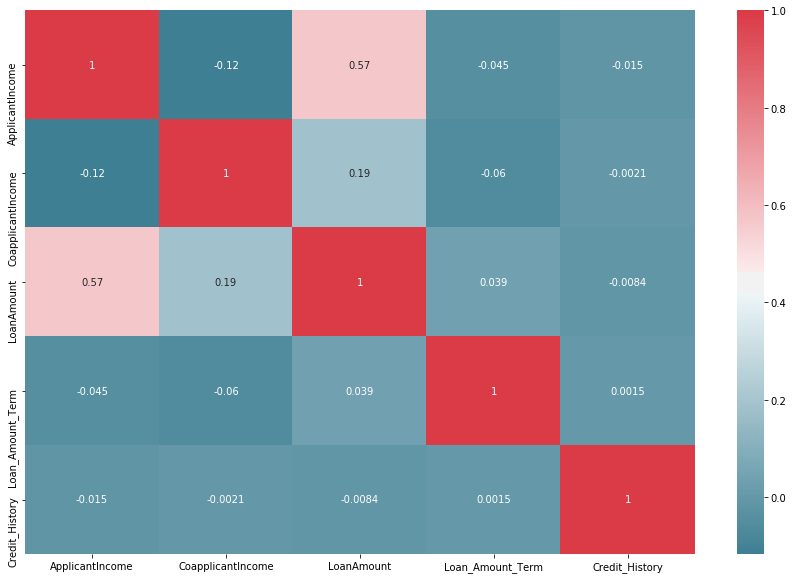

In [18]:
def correlation_heatmap(train):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(train.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(train)

In [19]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [21]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [22]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [23]:
test = test.drop('Loan_ID',1)
train = train.drop('Loan_ID',1)

In [24]:
X = train.drop('Loan_Status',1)
y = train['Loan_Status']

In [25]:
X=pd.get_dummies(X)
test=pd.get_dummies(test)
train=pd.get_dummies(train)

In [26]:
from sklearn.model_selection  import  train_test_split
X_train,x_cv,y_train,y_cv  = train_test_split(X,y,test_size=.3)

In [31]:
# Creating the classifier object 
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)

In [32]:
clf_gini.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [36]:
y_pred = clf_gini.predict(x_cv)

In [38]:
print("Confusion Matrix: ",confusion_matrix(y_cv, y_pred))       
print ("Accuracy : ",accuracy_score(y_cv,y_pred)*100) 
print("Report : ",classification_report(y_cv, y_pred)) 
  
    

Confusion Matrix:  [[ 25  32]
 [  2 126]]
Accuracy :  81.62162162162161
Report :                precision    recall  f1-score   support

           N       0.93      0.44      0.60        57
           Y       0.80      0.98      0.88       128

    accuracy                           0.82       185
   macro avg       0.86      0.71      0.74       185
weighted avg       0.84      0.82      0.79       185

